# Returns Demo

### LOB overview

What data have we analysed last week?

   1) Stock data (LOBSTER).
   
   2) Crypto data (Kraken).
    
Depending on the source, data have different formats and content. 

In demo we will use cleaned LOB data (from the 'cleaned_data' folder) obtained by running 'preprocessing.py' on the raw LOBSTER files.

In [1]:
#import libraries
import glob

import pandas as pd
import numpy as np

import scipy.stats.distributions as sts
from scipy.stats import norm
import scipy as sp
import statsmodels.api as sm

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
stock = 'FB'

In [ ]:
all_files = glob.glob(f"./Stocks/{stock}/cleaned_data/*.*")
all_files

In [ ]:
df = pd.read_csv(all_files[0])
df.columns

In [ ]:
df.DateTime = pd.to_datetime(df.DateTime, format='%Y-%m-%d %H:%M:%S:%f')
#df.DateTime = pd.to_datetime(df.DateTime)

In [ ]:
#Q1: calculate the mid-price and add an extra column to the dataframe to store it.

In [ ]:
#Q2: plot mid-price in time (you can use plt.plot)

In [ ]:
#Q3: calculate the mean spread, what information does spread provide?

In [ ]:
#Q4: provide a definition of tick size and calculate it empirically from the price data

### Analysis of returns

We can define multiple types of returns in LOB. Each of them has a different meaning. Here we will analyse the simplest definition of LOB returns. As a first step we need to group ticks in bins with a fixed time size (e.g. 1s, 10s, 1T, 1H, ...).

In [ ]:
bin_size = '1s'
groups_by_secs = df.groupby(pd.Grouper(key='DateTime', freq=bin_size))

In [ ]:
group_ticks_len = []
open_mid = []
high_mid = []
low_mid = []
close_mid = []
number_missing_seconds = 0

for k in groups_by_secs:
    if len(k[1] != 0):
        group_ticks_len.append(len(k[1]))
        open_mid.append(list(k[1].MidPrice)[0])
        high_mid.append(max(list(k[1].MidPrice)))
        low_mid.append(min(list(k[1].MidPrice)))
        close_mid.append(list(k[1].MidPrice)[-1])
    else:
        number_missing_seconds += 1

In [ ]:
print(f"Average bins size: {round(np.mean(group_ticks_len), 2)} ticks.")
print(f"Std bins' length: {round(np.std(group_ticks_len), 2)} ticks.")
print(f"Number of missing bins (={bin_size}) in one trading day: {number_missing_seconds}")
print(f"Average mid price: {round(np.mean(close_mid), 2)}$")

In [ ]:
#Q5: try to decrease bin size, what do you observe in terms 'Number of missing/empty bins' and why?

In [ ]:
plt.hist(group_ticks_len, bins=100)
plt.axvline(np.mean(group_ticks_len), color='red', label="Average bins' size (in ticks)")
plt.title("Bins' size distribution")
plt.xlabel('Size of the bin')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
plt.hist(group_ticks_len, bins=100, histtype='step')
plt.axvline(np.mean(group_ticks_len), color='red', label="Average bins' size (in ticks)")
plt.xscale('log')
plt.yscale('log')
plt.title("Bins' size distribution (log-log plot)")
plt.xlabel('Size of the bin')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Let's transform bins into OHLC (open, high, low, close) data.

In [ ]:
ohlc = pd.DataFrame({'Open':open_mid, 'High':high_mid, 'Low':low_mid, 'Close':close_mid})

In [ ]:
#Q6: calculate the returns from the closing mid-price

In [ ]:
#Q7 plot the returns vs. time and their distribution (histogram)

In [ ]:
plt.hist(log_rets, bins=100, histtype='step')
plt.xlabel('Log return')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.title("Log returns' distribution (log-log plot)")

Let's try to study normality of returns' distribution based on the empirical kurtosis.

In [ ]:
#Q8: define a function to calculate the kurtosis of the distribution and print it

In [ ]:
def compute_empirical_kurtosis(arr):
   #[.....]
    return kurtosis

In [ ]:
print(f"Empirical kurtosis of {stock} stock's returns is equal to {round(compute_empirical_kurtosis([......]), 2)}.")

Let's now generate random normally distributed data and let's see what is its kurtosis.

In [ ]:
mu, sigma = 0, 1
random_normal_data = np.random.normal(mu, sigma, 1000000)

In [ ]:
plt.hist(random_normal_data, bins=100)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title("Random normally distributed data")
plt.show()

In [ ]:
print(f"Empirical kurtosis of normally distributed random data {round(compute_empirical_kurtosis(random_normal_data), 2)}.")

In [ ]:
#Q9: how should we normalise returns to compare them across stocks? Calculate the appropriate quantity and normalise the returns accordingly

In [ ]:
#Q10: Calculate the empirical (complementary) cumulative density function and plot it against the Gaussian corresponding distribution

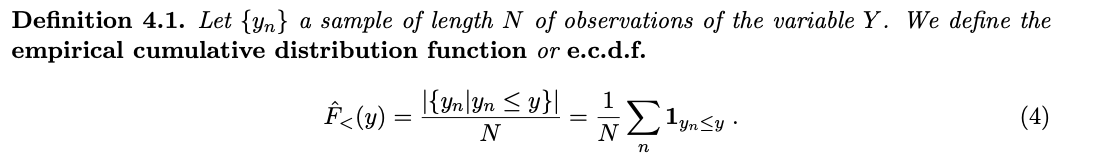

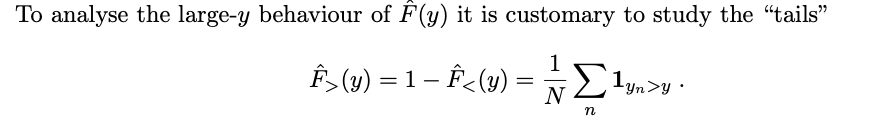

In [ ]:
def ccdf(data):
     #[...]
    return(x,y)

In [ ]:
def gaussian_ccdf(data):
    x = np.array(sorted(data))
    N = len(data)
    mean = sum(data)/N
    std = np.sqrt(sum((data-mean)**2)/N)
    c = 0.5*(1 - sp.special.erf((x-mean)/(std*np.sqrt(2))))
    return(x,c)

Let's now study returns' autocorrelation dynamics. We start with a toy example that allows us to better understand how to compute the autocorrelation function.

In [ ]:
lags = range(10)

In [ ]:
data = [3, 16, 156, 47, 246, 176, 233, 140, 130, 
        101, 166, 201, 200, 116, 118, 247, 
        209, 52, 153, 232, 128, 27, 192, 168, 208, 
        187, 228, 86, 30, 151, 18, 254, 
        76, 112, 67, 244, 179, 150, 89, 49, 83, 147, 90, 
        33, 6, 158, 80, 35, 186, 127]

In [ ]:
acorr = len(lags) * [0]

# Mean
mean = sum(data) / len(data) 

# Variance
var = sum([(x - mean)**2 for x in data]) / len(data) 

# Normalised data
ndata = [x - mean for x in data]

In [ ]:
print(f"Mean: {mean}")
print(f"Variance: {var}")
print(f"Normalised data: {ndata}")

In [ ]:
for l in lags:
    c = 1
    
    if (l > 0):
        tmp = []
        for i in range(len(data) - l):
            print(ndata[l:][i])
            print(ndata[:-l][i])
            tmp.append(ndata[l:][i] * ndata[:-l][i])
            print('###')
        
        c = sum(tmp) / (len(data)-l) / var
        
    acorr[l] = c

Let's now come back to our returns.

In [ ]:
#Q11: Using autocorrelation function above and built in Python libraries plot show and explain the phenomenon of 
#volatility clustering

Let's now compute the variogram.

In [ ]:
vdata = np.array(log_rets)

# Mean
mean = sum(vdata)/len(vdata)

# Variance
var = sum([(x - mean)**2 for x in vdata]) / len(vdata) 

In [ ]:
vvalues = len(lags) * [0]

In [ ]:
for l in lags:
    c = 1
    
    if (l > 0):
        tmp = []
        for i in range(len(vdata) - l):
            tmp.append((vdata[l:][i] - vdata[:-l][i])**2)
        
        c = sum(tmp) / (2*(len(vdata))) / var
        
    vvalues[l] = c

In [ ]:
plt.plot(lags, vvalues)
plt.xscale('log')
plt.yscale('log')
plt.title('Variogram')

As an exercise try to compute the correlogram of log-returns (not absolute log-returns) and try to sum it to the corresponding variogram.

In [ ]:
'''plt.clf()
plt.plot(acorr[1:])
plt.plot(vvalues[1:])
plt.plot([x + y for x, y in zip(acorr[1:], vvalues[1:])])'''

Let's put all toghether now.

In [ ]:
stocks = ['JNJ', 'GOOG', 'TSLA', 'MSFT']
colors = ['red', 'blue', 'black', 'orange']

In [ ]:
stocks_dict = {}

for s in stocks:
    all_files = glob.glob(f"./Stocks/{s}/cleaned_data/*.*")
    
    df = pd.read_csv(all_files[0])
    df.DateTime = pd.to_datetime(df.DateTime, format='%Y-%m-%d %H:%M:%S:%f')
    df['MidPrice'] = (df.Ask_Price_Level_1 + df.Bid_Price_Level_1)/2
    
    average_spread = np.mean(df.Ask_Price_Level_1 - df.Bid_Price_Level_1)
    print(f"Average spread for stock {s}: {round(average_spread, 2)}")
    
    prices_volumes = df.iloc[:, 6:-1]
    prices_ask_side = prices_volumes.iloc[:, 0::4]
    prices_bid_side = prices_volumes.iloc[:, 2::4]

    flatten_ask_diff = np.array(prices_ask_side.diff(axis=1).iloc[:, 1:]).flatten()
    flatten_bid_diff = np.array(prices_bid_side.diff(axis=1).iloc[:, 1:]).flatten()

    flatten_bid_ask = np.concatenate((flatten_ask_diff, flatten_bid_diff))

    empirical_tick_size = np.mean(np.abs(flatten_bid_ask))
    print(f"Empirical tick size for stock {s}: {round(empirical_tick_size, 2)}")
    
    stocks_dict[s] = df
    print('###')

In [ ]:
ohlc_dict = {}

for s in stocks:
    df = stocks_dict[s]
    bin_size = '10s'
    groups_by_secs = df.groupby(pd.Grouper(key='DateTime', freq=bin_size))
    
    group_ticks_len = []
    open_mid = []
    high_mid = []
    low_mid = []
    close_mid = []
    number_missing_seconds = 0

    for k in groups_by_secs:
        if len(k[1] != 0):
            group_ticks_len.append(len(k[1]))
            open_mid.append(list(k[1].MidPrice)[0])
            high_mid.append(max(list(k[1].MidPrice)))
            low_mid.append(min(list(k[1].MidPrice)))
            close_mid.append(list(k[1].MidPrice)[-1])
        else:
            number_missing_seconds += 1
            
    ohlc = pd.DataFrame({'Open':open_mid, 'High':high_mid, 'Low':low_mid, 'Close':close_mid})
    ohlc_dict[s] = ohlc

In [ ]:
rets_dict = {}

for s in stocks:
    ohlc = ohlc_dict[s]
    log_rets = (np.log(ohlc.Close) - np.log(ohlc.Close.shift(1))).dropna()
    rets_dict[s] = log_rets

In [ ]:
for s in stocks:
    plt.clf()
    plt.hist(rets_dict[s], bins=100)
    plt.xlabel('Log return')
    plt.ylabel('Frequency')
    plt.title(f"Log returns' distribution for stock {s}")
    plt.show()
    print(f"Empirical kurtosis of {s} stock's returns is equal to {round(compute_empirical_kurtosis(rets_dict[s]), 2)}.")
    print('##########################################')

In [ ]:
plt.clf()
plt.figure(figsize=(25,10))
for s, c in zip(stocks, colors):
    ohlc = ohlc_dict[s]
    log_rets = (np.log(ohlc.Close) - np.log(ohlc.Close.shift(1))).dropna()/daily_volatility(ohlc.Close)
    
    ccdf_rets_x, ccdf_rets_y = ccdf(log_rets)
    ccdf_gaussian_x, ccdf_gaussian_y = gaussian_ccdf(log_rets)
    
    plt.semilogy(ccdf_rets_x, ccdf_rets_y, label=s, color=c)
    plt.semilogy(ccdf_gaussian_x, ccdf_gaussian_y, ls='--', label=f"Gaussian {s}", color=c)
    plt.xlabel('return')
    plt.ylabel('ccdf')
    plt.xlim(-10e-4, 10e-3)
    plt.ylim(10e-4, 10e0)

plt.legend(fontsize=14)
plt.show()